In [1]:
import xarray as xr

ds = xr.open_dataset("Uttarakhand_precipitation1985_2024.nc")
print("Variables:\n", list(ds.variables))
print("\nDimensions:\n", list(ds.dims))
print("\nFull Dataset Info:\n")
print(ds)

Variables:
 ['number', 'valid_time', 'latitude', 'longitude', 'expver', 'tp']

Dimensions:
 ['valid_time', 'latitude', 'longitude']

Full Dataset Info:

<xarray.Dataset>
Dimensions:     (valid_time: 19520, latitude: 13, longitude: 17)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 1985-06-01 ... 2024-09-30T18:00:00
  * latitude    (latitude) float64 32.0 31.75 31.5 31.25 ... 29.5 29.25 29.0
  * longitude   (longitude) float64 77.0 77.25 77.5 77.75 ... 80.5 80.75 81.0
    expver      (valid_time) object ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-20T11:18 GRIB to CDM+CF via cfgrib-0.9.1...


In [1]:
import xarray as xr
import numpy as np

ds = xr.open_dataset("Uttarakhand_precipitation1985_2024.nc")
precip = ds['tp']

# Function to compute Standard precipitation index for May–July of a year
def spi_for_year(year):
    subset = precip.sel(valid_time=slice(f"{year}-05-01", f"{year}-07-31"))
    Pi = float(subset.mean(dim=["valid_time", "latitude", "longitude"]).values)
    return Pi

# Collecting May–July averages for all years
years = np.arange(1985, 2025) 
values = []

for y in years:
    subset = precip.sel(valid_time=slice(f"{y}-06-01", f"{y}-09-30"))
    # skip empty years
    if subset.sizes["valid_time"] > 0:  
        mean_val = float(subset.mean(dim=["valid_time", "latitude", "longitude"]).values)
        values.append((y, mean_val))

all_years = np.array([v[0] for v in values])
all_means = np.array([v[1] for v in values])

# mean and std for May–July
mean_longterm = np.mean(all_means)
std_longterm = np.std(all_means)

#output
for target in [2009, 2010, 2011, 2012, 2013, 2014]:
    Pi = dict(values)[target]
    spi = (Pi - mean_longterm) / std_longterm
    print(f"Standard Precipitation Index for {target} (June–Sept) = {spi:.3f}")


Standard Precipitation Index for 2009 (June–Sept) = -1.043
Standard Precipitation Index for 2010 (June–Sept) = 2.987
Standard Precipitation Index for 2011 (June–Sept) = 0.743
Standard Precipitation Index for 2012 (June–Sept) = -0.357
Standard Precipitation Index for 2013 (June–Sept) = 1.277
Standard Precipitation Index for 2014 (June–Sept) = -1.223


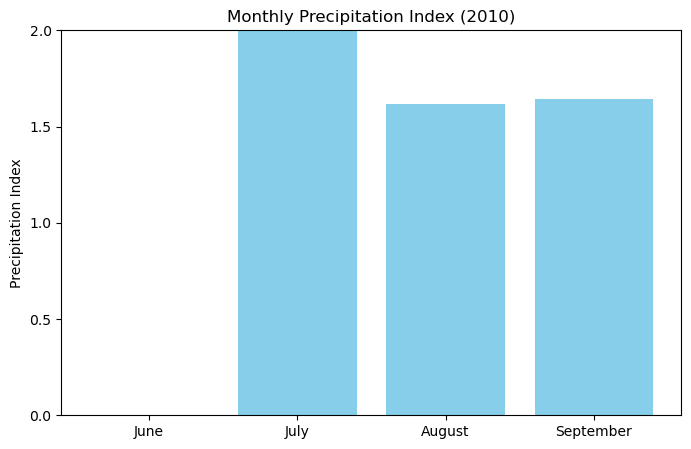

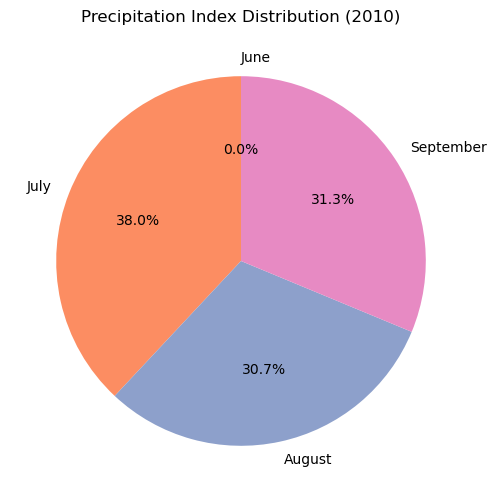

In [21]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
ds = xr.open_dataset("Uttarakhand_precipitation1985_2024.nc")
precip = ds['tp']

# Function to get monthly precipitation index for a year
def monthly_precip_index(year):
    subset = precip.sel(valid_time=slice(f"{year}-06-01", f"{year}-09-30"))
    if subset.sizes["valid_time"] == 0:
        return None
    df = subset.to_dataframe().reset_index()
    df['month'] = df['valid_time'].dt.month
    monthly_means = df.groupby('month')['tp'].mean()
    
    # Scale to smaller values (e.g., 0–2 range)
    min_val = monthly_means.min()
    max_val = monthly_means.max()
    monthly_index = 2 * (monthly_means - min_val) / (max_val - min_val)  # scaled to 0-2
    return monthly_index

# Choose year
year = 2010
monthly_index = monthly_precip_index(year)

if monthly_index is not None:
    months = ['June', 'July', 'August', 'September']
    values = [monthly_index.get(m, 0) for m in range(6, 10)]

    # --- Bar Chart ---
    plt.figure(figsize=(8,5))
    plt.bar(months, values, color='skyblue')
    plt.title(f'Monthly Precipitation Index ({year})')
    plt.ylabel('Precipitation Index')
    plt.ylim(0, 2)  # y-axis range 0–2
    plt.yticks(np.arange(0, 2.1, 0.5))  # y-axis ticks: 0, 0.5, 1, 1.5, 2
    plt.show()
    
    # --- Pie Chart ---
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=months, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
    plt.title(f'Precipitation Index Distribution ({year})')
    plt.show()
else:
    print(f"No data available for {year}")


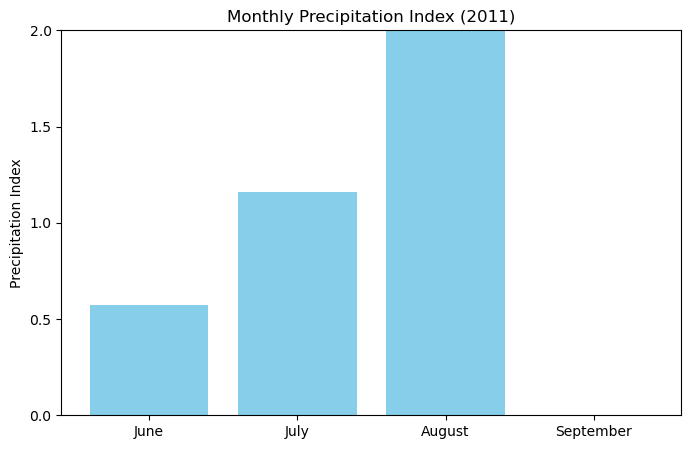

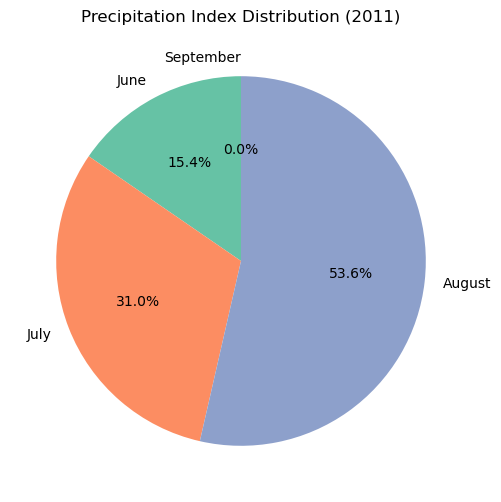

In [23]:
year = 2011
monthly_index = monthly_precip_index(year)

if monthly_index is not None:
    months = ['June', 'July', 'August', 'September']
    values = [monthly_index.get(m, 0) for m in range(6, 10)]

    # --- Bar Chart ---
    plt.figure(figsize=(8,5))
    plt.bar(months, values, color='skyblue')
    plt.title(f'Monthly Precipitation Index ({year})')
    plt.ylabel('Precipitation Index')
    plt.ylim(0, 2)  # y-axis range 0–2
    plt.yticks(np.arange(0, 2.1, 0.5))  # y-axis ticks: 0, 0.5, 1, 1.5, 2
    plt.show()
    
    # --- Pie Chart ---
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=months, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
    plt.title(f'Precipitation Index Distribution ({year})')
    plt.show()
else:
    print(f"No data available for {year}")

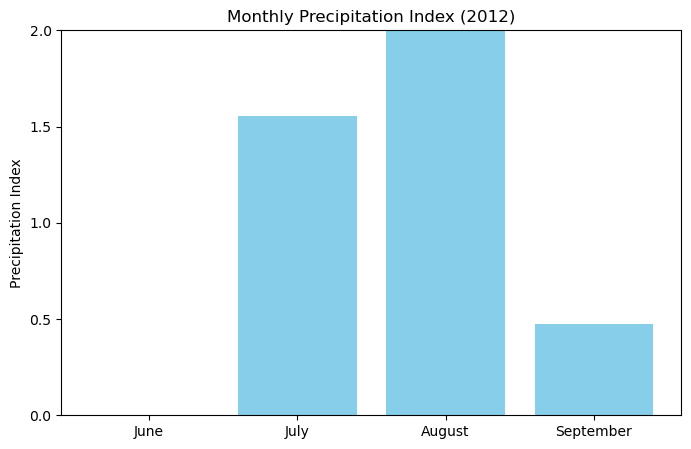

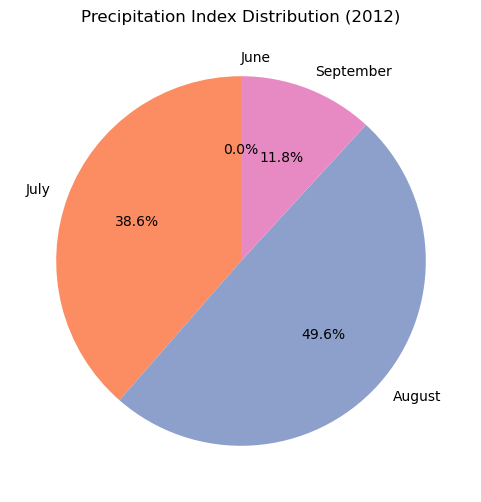

In [25]:
year = 2012
monthly_index = monthly_precip_index(year)

if monthly_index is not None:
    months = ['June', 'July', 'August', 'September']
    values = [monthly_index.get(m, 0) for m in range(6, 10)]

    # --- Bar Chart ---
    plt.figure(figsize=(8,5))
    plt.bar(months, values, color='skyblue')
    plt.title(f'Monthly Precipitation Index ({year})')
    plt.ylabel('Precipitation Index')
    plt.ylim(0, 2)  # y-axis range 0–2
    plt.yticks(np.arange(0, 2.1, 0.5))  # y-axis ticks: 0, 0.5, 1, 1.5, 2
    plt.show()
    
    # --- Pie Chart ---
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=months, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
    plt.title(f'Precipitation Index Distribution ({year})')
    plt.show()
else:
    print(f"No data available for {year}")

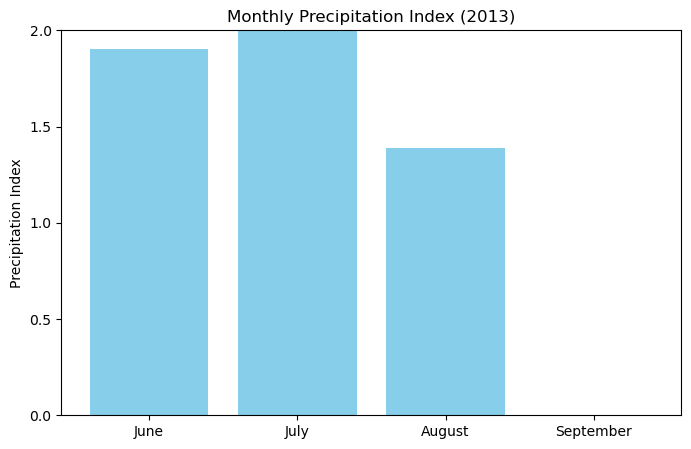

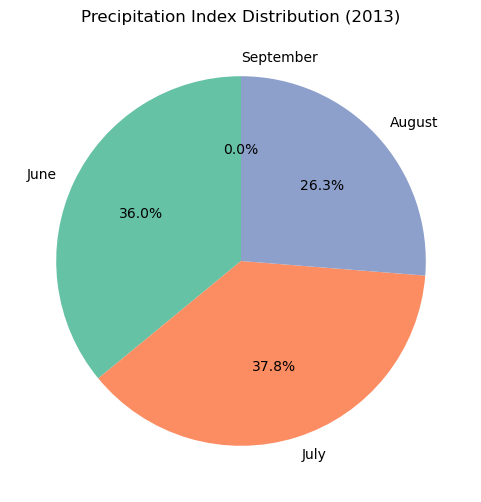

In [27]:
year = 2013
monthly_index = monthly_precip_index(year)

if monthly_index is not None:
    months = ['June', 'July', 'August', 'September']
    values = [monthly_index.get(m, 0) for m in range(6, 10)]

    # --- Bar Chart ---
    plt.figure(figsize=(8,5))
    plt.bar(months, values, color='skyblue')
    plt.title(f'Monthly Precipitation Index ({year})')
    plt.ylabel('Precipitation Index')
    plt.ylim(0, 2)  # y-axis range 0–2
    plt.yticks(np.arange(0, 2.1, 0.5))  # y-axis ticks: 0, 0.5, 1, 1.5, 2
    plt.show()
    
    # --- Pie Chart ---
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=months, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
    plt.title(f'Precipitation Index Distribution ({year})')
    plt.show()
else:
    print(f"No data available for {year}")

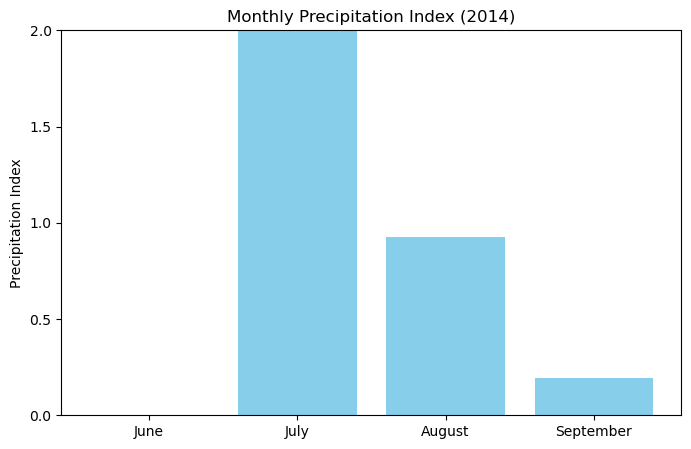

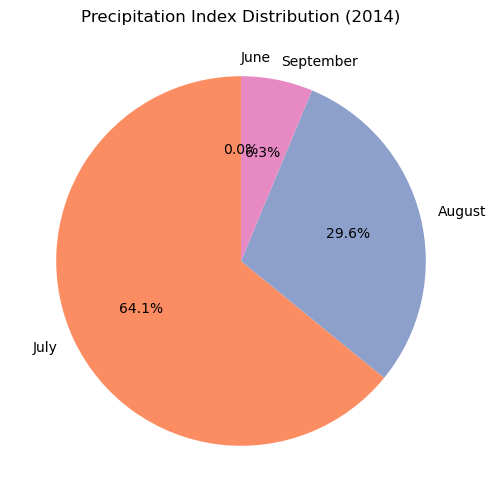

In [31]:
year = 2014
monthly_index = monthly_precip_index(year)

if monthly_index is not None:
    months = ['June', 'July', 'August', 'September']
    values = [monthly_index.get(m, 0) for m in range(6, 10)]

    # --- Bar Chart ---
    plt.figure(figsize=(8,5))
    plt.bar(months, values, color='skyblue')
    plt.title(f'Monthly Precipitation Index ({year})')
    plt.ylabel('Precipitation Index')
    plt.ylim(0, 2)  # y-axis range 0–2
    plt.yticks(np.arange(0, 2.1, 0.5))  # y-axis ticks: 0, 0.5, 1, 1.5, 2
    plt.show()
    
    # --- Pie Chart ---
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=months, autopct='%1.1f%%', startangle=90, colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
    plt.title(f'Precipitation Index Distribution ({year})')
    plt.show()
else:
    print(f"No data available for {year}")

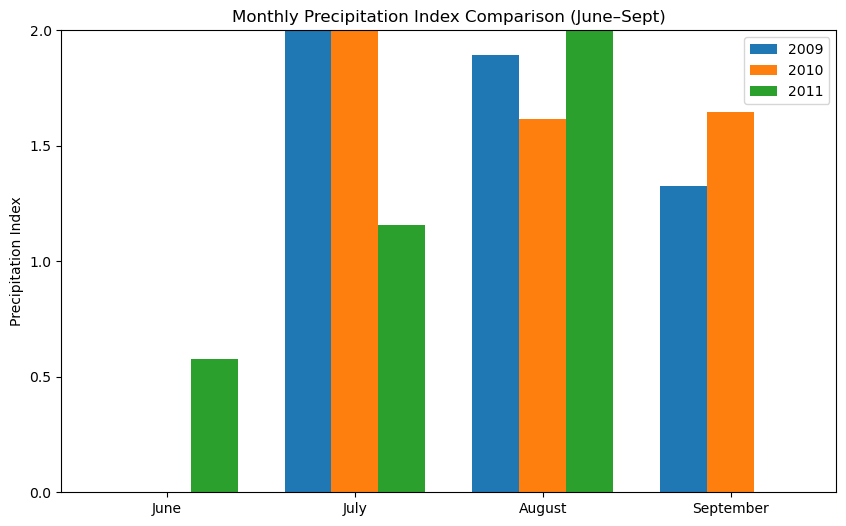

In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
ds = xr.open_dataset("Uttarakhand_precipitation1985_2024.nc")
precip = ds['tp']

# Function to get monthly precipitation for a year
def monthly_precip(year):
    subset = precip.sel(valid_time=slice(f"{year}-06-01", f"{year}-09-30"))
    if subset.sizes["valid_time"] == 0:
        return None
    df = subset.to_dataframe().reset_index()
    df['month'] = df['valid_time'].dt.month
    monthly_means = df.groupby('month')['tp'].mean()
    return monthly_means

# Years to compare
years = [2009, 2010, 2011]
months = ['June', 'July', 'August', 'September']

# Collect monthly values for each year and convert to index (0–2 scale)
data = {}
for year in years:
    monthly_values = monthly_precip(year)
    if monthly_values is not None:
        # Scale to 0–2
        min_val = monthly_values.min()
        max_val = monthly_values.max()
        index_values = 2 * (monthly_values - min_val) / (max_val - min_val)
        data[year] = [index_values.get(m, 0) for m in range(6,10)]

# --- Grouped Bar Chart ---
x = np.arange(len(months))
width = 0.25

plt.figure(figsize=(10,6))
for i, year in enumerate(years):
    plt.bar(x + i*width, data[year], width=width, label=str(year))

plt.xticks(x + width, months)
plt.ylabel('Precipitation Index')
plt.ylim(0,2)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Monthly Precipitation Index Comparison (June–Sept)')
plt.legend()
plt.show()

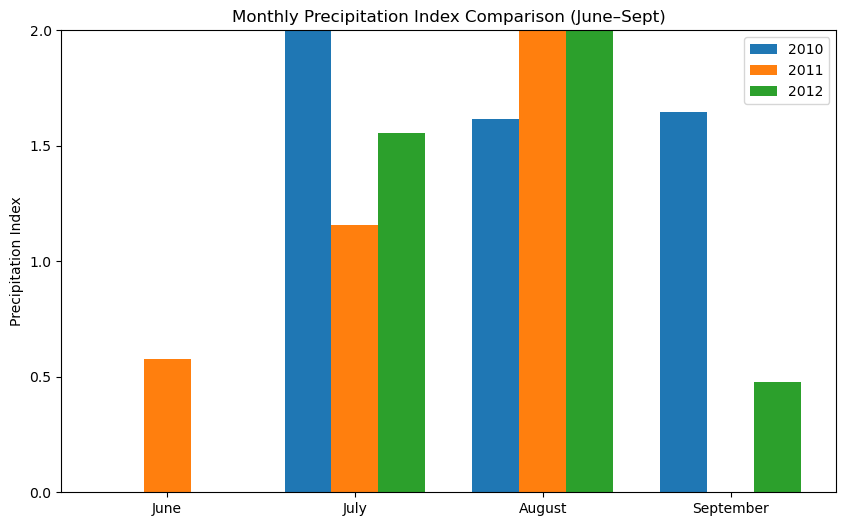

In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
ds = xr.open_dataset("Uttarakhand_precipitation1985_2024.nc")
precip = ds['tp']

# Function to get monthly precipitation for a year
def monthly_precip(year):
    subset = precip.sel(valid_time=slice(f"{year}-06-01", f"{year}-09-30"))
    if subset.sizes["valid_time"] == 0:
        return None
    df = subset.to_dataframe().reset_index()
    df['month'] = df['valid_time'].dt.month
    monthly_means = df.groupby('month')['tp'].mean()
    return monthly_means

# Years to compare
years = [2010, 2011, 2012]
months = ['June', 'July', 'August', 'September']

# Collect monthly values for each year and convert to index (0–2 scale)
data = {}
for year in years:
    monthly_values = monthly_precip(year)
    if monthly_values is not None:
        # Scale to 0–2
        min_val = monthly_values.min()
        max_val = monthly_values.max()
        index_values = 2 * (monthly_values - min_val) / (max_val - min_val)
        data[year] = [index_values.get(m, 0) for m in range(6,10)]

# --- Grouped Bar Chart ---
x = np.arange(len(months))
width = 0.25

plt.figure(figsize=(10,6))
for i, year in enumerate(years):
    plt.bar(x + i*width, data[year], width=width, label=str(year))

plt.xticks(x + width, months)
plt.ylabel('Precipitation Index')
plt.ylim(0,2)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Monthly Precipitation Index Comparison (June–Sept)')
plt.legend()
plt.show()

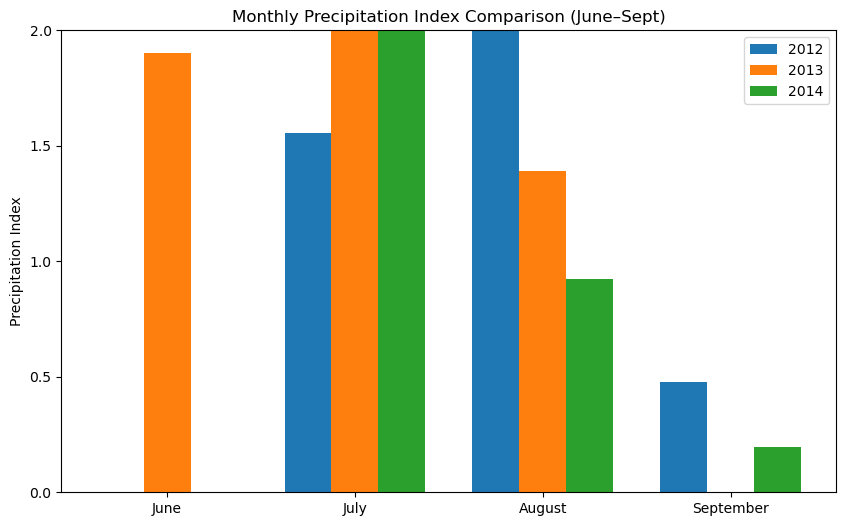

In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
ds = xr.open_dataset("Uttarakhand_precipitation1985_2024.nc")
precip = ds['tp']

# Function to get monthly precipitation for a year
def monthly_precip(year):
    subset = precip.sel(valid_time=slice(f"{year}-06-01", f"{year}-09-30"))
    if subset.sizes["valid_time"] == 0:
        return None
    df = subset.to_dataframe().reset_index()
    df['month'] = df['valid_time'].dt.month
    monthly_means = df.groupby('month')['tp'].mean()
    return monthly_means

# Years to compare
years = [2012, 2013, 2014]
months = ['June', 'July', 'August', 'September']

# Collect monthly values for each year and convert to index (0–2 scale)
data = {}
for year in years:
    monthly_values = monthly_precip(year)
    if monthly_values is not None:
        # Scale to 0–2
        min_val = monthly_values.min()
        max_val = monthly_values.max()
        index_values = 2 * (monthly_values - min_val) / (max_val - min_val)
        data[year] = [index_values.get(m, 0) for m in range(6,10)]

# --- Grouped Bar Chart ---
x = np.arange(len(months))
width = 0.25

plt.figure(figsize=(10,6))
for i, year in enumerate(years):
    plt.bar(x + i*width, data[year], width=width, label=str(year))

plt.xticks(x + width, months)
plt.ylabel('Precipitation Index')
plt.ylim(0,2)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Monthly Precipitation Index Comparison (June–Sept)')
plt.legend()
plt.show()